In [6]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
%config InlineBackend.figure_format = 'svg'  ###配置可以保存为矢量图
%matplotlib inline 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
import scipy as sp # scientific computation library
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split #cross_validation
from sklearn.metrics import mean_squared_error

## 4.1.1 Linear regression with $L_2$ norm penalty through gradient descent

(100, 1)
(100, 1)
(70, 1)
(30, 1)


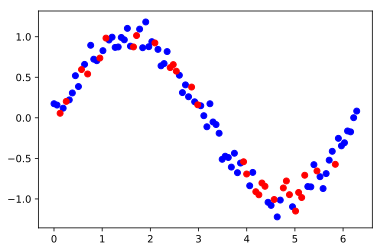

In [7]:
def f(x):
    y=np.sin(x)
    return y
# X=np.arange(0,2*np.pi,0.2,dtype='float32')
# sample_size=2*np.pi/0.2
sample_size=100
X=np.linspace(0,2*np.pi,sample_size)
y=f(X)+np.random.normal(0,0.1,sample_size) 
y=np.atleast_2d(y).T
print(y.shape)
X = np.atleast_2d(X).T  #
print(X.shape)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)  
print(X_train.shape)
print(X_test.shape)
plt.scatter(X_train,y_train, c='b')
plt.scatter(X_test, y_test, c='r')

In [8]:
from sklearn.preprocessing import PolynomialFeatures
#1到5次函数拟合,求出design matrix A
# Amot=[]
# for d in range(5):
#     polyfeat = PolynomialFeatures(degree =d+1, include_bias = True)
#     A_sklearn = polyfeat.fit_transform(X) 
#     print(A_sklearn.shape)
#     Amot.append(A_sklearn)
    
polyfeat1 = PolynomialFeatures(degree =1, include_bias = True)
A_sklearn1 = polyfeat1.fit_transform(X) 
print(A_sklearn1.shape)

polyfeat2 = PolynomialFeatures(degree =2, include_bias = True)
A_sklearn2 = polyfeat2.fit_transform(X) 
print(A_sklearn2.shape)

polyfeat3 = PolynomialFeatures(degree =3, include_bias = True)
A_sklearn3 = polyfeat3.fit_transform(X) 
print(A_sklearn3.shape)

polyfeat4 = PolynomialFeatures(degree =4, include_bias = True)
A_sklearn4 = polyfeat4.fit_transform(X) 
print(A_sklearn4.shape)

polyfeat5 = PolynomialFeatures(degree =5, include_bias = True)
A_sklearn5 = polyfeat5.fit_transform(X) 
print(A_sklearn5.shape)

(100, 2)
(100, 3)
(100, 4)
(100, 5)
(100, 6)


In [9]:
'''
in: Xmat 1*N
out: X add a column of ones to N*2 matrix, N*3
'''
def designmat1(Xmat): # Xmat 2*N times, N:numbers of datasets
#     print('Xmat',Xmat.shape) #50
    #(1) assemble each input vector as a row 
    X = np.atleast_2d(Xmat).T  #to 2d array then transpose, N*2
    #(2) add a column of ones to N*2 matrix
    col1 = np.ones(np.shape(X)[0]).reshape(np.shape(X)[0],1) #the column vector which consists of n ones
    # reshapte refers to ravel a array, this convert to N*1
    X = np.concatenate((col1, X), axis=1) #Join a sequence of arrays:X along an existing axis.
    n,p=X.shape
    print('X',n,p)
#     print('X=',X)
    return X

In [10]:
'''
梯度下降函数
w:p*1(p为拟合次数)
X:n*p(n为数据集个数),为design matrix
y:n*1
l2是lambda,正则化参数
core是学习率=1, 0.000000006,  rate = 0.001
初值w,rate,n_iterations=50都是由自己给定的
'''
def reg_gradientdescent(w, X, y,l2,core=1, rate = 0.001, n_iterations = 100):
    wtseq = [w] #列表
    losshistory = [] 
    
    for iteration in range(n_iterations):
        w_without_t0=w[1:]  #把截距项去掉
        meanrss = 0.5*np.square(y-X.dot(w)).mean()+0.5*l2*np.sum(np.square(w_without_t0)) #标量
#         print(meanrss)
        losshistory.append(meanrss)
        w_with_t0_0=np.r_[np.zeros([1,1]),w[1:]]  #set w[0]=0,不考虑截距项
#         print("w_with_t0_0=",w_with_t0_0)
#         gradients =  core*2/len(X) * X.T.dot(X.dot(w) - y) + \
#                      + 2 * l2 * w_with_t0_0
#         gradients =  core*1/len(X) * X.T.dot(X.dot(w) - y) + \
#                      + 1 * l2 * w_with_t0_0
        gradients =  core*2/len(X) * X.T.dot(X.dot(w) - y) + 2 * l2 * w
        w = w - rate * gradients 
        
#         if(iteration==0):
#             print(w.shape)    #2*1
        wtseq.append(w) 
#         if(iteration==0):
#             print(wtseq)
    whist=np.asarray(wtseq)
    meanlosstrace=np.asarray(losshistory)
    return  w, whist, meanlosstrace


In [11]:
# def gradsqloss(Amat, y, wt):
#     n, p = Amat.shape
#     return (-2/n)*Amat.T.dot((y-Amat.dot(wt))+2 * l2 * wt)

# def reg_gradientdescent(Amat, y, winit, rate, l2,numiter):
#     n, p = Amat.shape
#     whistory = []
#     meanrsshistory = [] 
#     w = winit
    
#     for i in range(numiter): 
#         meanrss = np.square(y-Amat.dot(w)).mean()
#         whistory.append(w)
#         meanrsshistory.append(meanrss)
#         grad = gradsqloss(Amat, y, w)
#         w = w - rate*grad
#     return w, np.asarray(whistory), np.asarray(meanrsshistory)

In [12]:
# wt_init = np.array([[-0.5], [-1]])  ###2*1,不是一个一维数组
n, p = A_sklearn1.shape
wt_init = np.random.randn(p)
print(wt_init.shape)
wt_init=np.atleast_2d(wt_init).T
print(wt_init.shape)
# wt_init=[[-0.5],[-0.1]]
numiter=50
rate=0.001
l2=0.0001
# wfin, whist, meanlosstrace= reg_gradientdescent(A_sklearn1,y,wt_init,rate,l2,numiter)
wfin, whist, meanlosstrace= reg_gradientdescent(wt_init,A_sklearn1,y,l2)
# print(w_path)
# print(w_path.shape) #51*2*1

(2,)
(2, 1)


(2,)
(2, 1)
Initial weight: [[1.76405235]
 [0.40015721]]
wfin= [[ 0.98515437]
 [-0.30778754]]


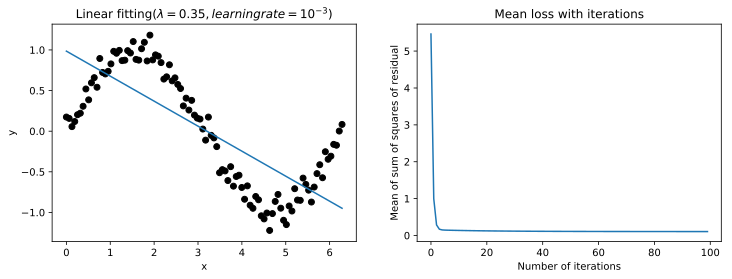

In [13]:
# 一次拟合
# w0=(-2.5,2.5)+np.random.randn(2)
# print(w0.shape)
np.random.seed(0)
n_iterations=50
l2=0.0001
n, p = A_sklearn1.shape
wt_init = np.random.randn(p)
print(wt_init.shape)
wt_init=np.atleast_2d(wt_init).T
print(wt_init.shape)
# wt_init=[[0.3],[0.1]]
print("Initial weight:", wt_init)
wfin, whist, meanlosstrace = reg_gradientdescent(wt_init, A_sklearn1, y, l2,n_iterations)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4)) #画一行两列
ax[0].scatter(X,y,marker='o',color='k')
print("wfin=",wfin)
ax[0].plot(X,wfin[0]+wfin[1]*X)  #拟合的曲线
ax[1].plot(meanlosstrace)  #误差曲线
ax[0].set_title(r"Linear fitting($\lambda=0.35,learning rate=10^{-3}$)")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].set_title("Mean loss with iterations")
ax[1].set_xlabel("Number of iterations")
ax[1].set_ylabel("Mean of sum of squares of residual")
plt.savefig('fit1.pdf', bbox_inches='tight')

(3,)
Initial weight: [[1.76405235]
 [0.40015721]
 [0.97873798]]
wfin= [[ 1.6938499 ]
 [ 0.16450697]
 [-0.12179077]]


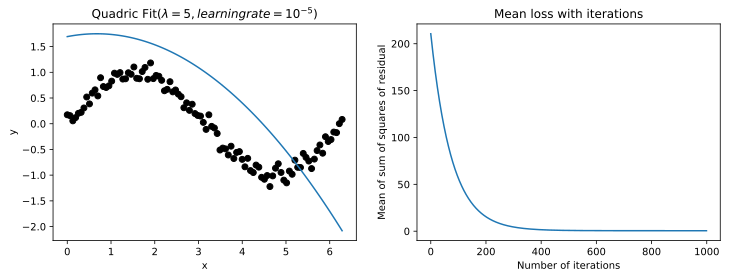

In [14]:
# 二次拟合
np.random.seed(0)
n, p = A_sklearn2.shape
wt_init = np.random.randn(p)
print(wt_init.shape)
wt_init=np.atleast_2d(wt_init).T  #p*1
# wt_init=[[0.3],[0.1],[0.1]]
print("Initial weight:", wt_init)
core=1
# l2=5
l2=0.35
rate=10**(-5)
n_iterations=1000
wfin, whist, meanlosstrace = reg_gradientdescent(wt_init, A_sklearn2, y,l2,core,rate,n_iterations)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4)) #画一行两列
ax[0].scatter(X,y,marker='o',color='k')
# y_predict=
print("wfin=",wfin)
y_pridict= A_sklearn2.dot(wfin)
ax[0].plot(X,y_pridict)  #拟合的曲线
ax[1].plot(meanlosstrace)  #误差曲线
ax[0].set_title(r"Quadric Fit($\lambda=5,learning rate=10^{-5}$)")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].set_title("Mean loss with iterations")
ax[1].set_xlabel("Number of iterations")
ax[1].set_ylabel("Mean of sum of squares of residual")
plt.savefig('fit2.pdf', bbox_inches='tight')

(3,)
Initial weight: [[1.76405235]
 [0.40015721]
 [0.97873798]]
rate= 1e-05
wfin= [[ 1.54358486]
 [ 0.14982573]
 [-0.11241012]]
rate= 0.0001
wfin= [[ 0.60495861]
 [ 0.02536086]
 [-0.04952271]]
rate= 0.001
wfin= [[ 0.04388141]
 [ 0.03351194]
 [-0.0274807 ]]


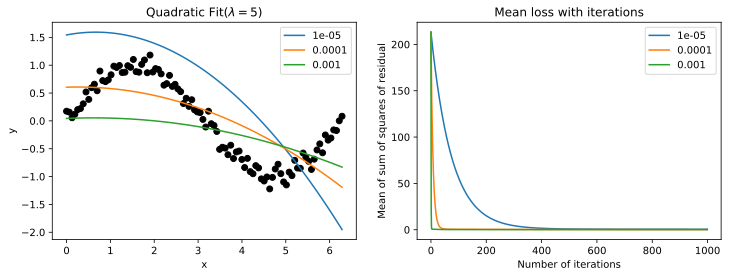

In [15]:
# 二次拟合,不同的rate
np.random.seed(0)
n, p = A_sklearn2.shape
wt_init = np.random.randn(p)
print(wt_init.shape)
wt_init=np.atleast_2d(wt_init).T  #p*1
# wt_init=[[0.3],[0.1],[0.1]]
print("Initial weight:", wt_init)
core=1
l2=5
# l2=0.35
# rate=10**(-5)
n_iterations=1000
rates = [10**(-5),10**(-4),.001]
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4)) #画一行两列
ax[0].scatter(X,y,marker='o',color='k')
for i,rate in enumerate(rates):
    print("rate=",rate)
    wfin, whist, meanlosstrace = reg_gradientdescent(wt_init, A_sklearn2, y,l2,core,rate,n_iterations)
    # y_predict=
    print("wfin=",wfin)
    y_pridict= A_sklearn2.dot(wfin)
    ax[0].plot(X,y_pridict,label=rate)    #拟合的曲线
    ax[1].plot(meanlosstrace,label=rate)  #误差曲线
ax[0].legend()
ax[1].legend()
ax[0].set_title(r"Quadratic Fit($\lambda=5$)")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].set_title("Mean loss with iterations")
ax[1].set_xlabel("Number of iterations")
ax[1].set_ylabel("Mean of sum of squares of residual")
plt.savefig('fit2rate.pdf', bbox_inches='tight')

(3,)
Initial weight: [[1.76405235]
 [0.40015721]
 [0.97873798]]
l2= 0.001
wfin= [[ 1.61068322]
 [ 0.04376063]
 [-0.09587384]]
l2= 0.01
wfin= [[ 1.60782939]
 [ 0.04371426]
 [-0.09574376]]
l2= 0.35
wfin= [[ 1.50367428]
 [ 0.04200675]
 [-0.09099281]]
l2= 1
wfin= [[ 1.32312292]
 [ 0.03896994]
 [-0.08273841]]
l2= 5
wfin= [[ 0.60495861]
 [ 0.02536086]
 [-0.04952271]]
l2= 10
wfin= [[ 0.23174421]
 [ 0.01594142]
 [-0.03163513]]


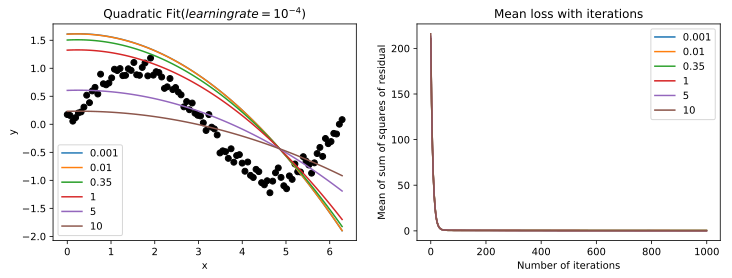

In [16]:
# 二次拟合,不同的lambda
np.random.seed(0)
n, p = A_sklearn2.shape
wt_init = np.random.randn(p)
print(wt_init.shape)
wt_init=np.atleast_2d(wt_init).T  #p*1
# wt_init=[[0.3],[0.1],[0.1]]
print("Initial weight:", wt_init)
core=1
l2=5
# l2=0.35
rate=10**(-4)
n_iterations=1000
lamb_array=[10**(-3),10**(-2),0.35,1,5,10]
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4)) #画一行两列
ax[0].scatter(X,y,marker='o',color='k')
for i,l2 in enumerate(lamb_array):
    print("l2=",l2)
    wfin, whist, meanlosstrace = reg_gradientdescent(wt_init, A_sklearn2, y,l2,core,rate,n_iterations)
    # y_predict=
    print("wfin=",wfin)
    y_pridict= A_sklearn2.dot(wfin)
    ax[0].plot(X,y_pridict,label=l2)    #拟合的曲线
    ax[1].plot(meanlosstrace,label=l2)  #误差曲线
ax[0].legend()
ax[1].legend()
ax[0].set_title(r"Quadratic Fit($learning rate=10^{-4}$)")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].set_title("Mean loss with iterations")
ax[1].set_xlabel("Number of iterations")
ax[1].set_ylabel("Mean of sum of squares of residual")
plt.savefig('fit2_lambda.pdf', bbox_inches='tight')

(4,)
(4, 1)
Initial weight: [[-0.05125456]
 [ 1.63637689]
 [-0.78471995]
 [ 0.08447873]]
wfin= [[-0.05056576]
 [ 1.62576649]
 [-0.77809027]
 [ 0.0833809 ]]


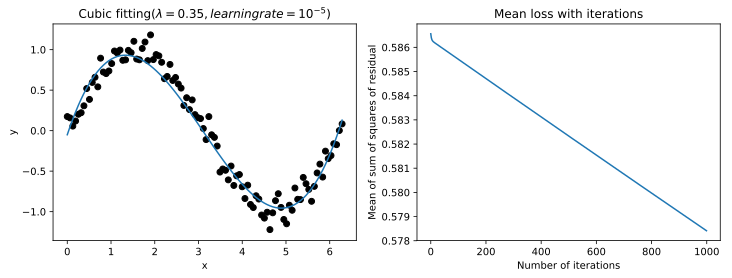

In [17]:
#三次拟合
np.random.seed(0)
n, p = A_sklearn3.shape
wt_init = np.random.randn(p)
print(wt_init.shape)
wt_init=np.atleast_2d(wt_init).T
print(wt_init.shape)
# wt_init=[[0.3],[0.1],[0.1],[0.1]]
wt_init=np.array([[-0.05125456],[ 1.63637689],[-0.78471995],[ 0.08447873]])
print("Initial weight:", wt_init)
core=1
l2=0.35 #0.0005 #20
rate=10**(-5)
n_iterations=1000
wfin, whist, meanlosstrace = reg_gradientdescent(wt_init, A_sklearn3, y, l2,core,rate,n_iterations)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4)) #画一行两列
ax[0].scatter(X,y,marker='o',color='k')
# y_predict=
print("wfin=",wfin)
y_pridict= A_sklearn3.dot(wfin)
ax[0].plot(X,y_pridict)  #拟合的曲线
ax[1].plot(meanlosstrace)  #误差曲线
ax[0].set_title(r"Cubic fitting($\lambda=0.35,learning rate=10^{-5}$)")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].set_title("Mean loss with iterations")
ax[1].set_xlabel("Number of iterations")
ax[1].set_ylabel("Mean of sum of squares of residual")
plt.savefig('fit3.pdf', bbox_inches='tight')

(5,)
(5, 1)
Initial weight: [[ 0.03268925]
 [ 1.30413531]
 [-0.52649501]
 [ 0.01777361]
 [ 0.00544374]]
wfin= [[ 0.03272188]
 [ 1.30421786]
 [-0.5263298 ]
 [ 0.01806267]
 [ 0.00533902]]


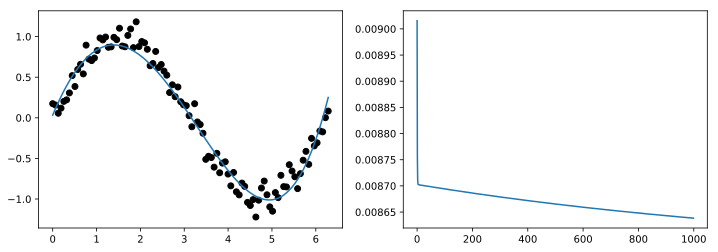

In [18]:
#四次拟合
np.random.seed(0)
n, p = A_sklearn4.shape
wt_init = np.random.randn(p)
print(wt_init.shape)
wt_init=np.atleast_2d(wt_init).T
print(wt_init.shape)
wt_init=np.array([[ 0.03268925],[ 1.30413531],[-0.52649501],[ 0.01777361],[ 0.00544374]])
print("Initial weight:", wt_init)
core=1
l2=10**(-5)
rate=10**(-6)
n_iterations=1000
wfin, whist, meanlosstrace = reg_gradientdescent(wt_init, A_sklearn4, y, l2,core,rate,n_iterations)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4)) #画一行两列
ax[0].scatter(X,y,marker='o',color='k')
# y_predict=
print("wfin=",wfin)
y_pridict= A_sklearn4.dot(wfin)
ax[0].plot(X,y_pridict)  #拟合的曲线
ax[1].plot(meanlosstrace)  #误差曲线

(6,)
(6, 1)
Initial weight: [[ 0.06609572]
 [ 0.76199846]
 [ 0.30174765]
 [-0.39249996]
 [ 0.08598679]
 [-0.00544834]]
wfin= [[ 0.06609893]
 [ 0.76200614]
 [ 0.30176475]
 [-0.39246599]
 [ 0.08603259]
 [-0.00546602]]


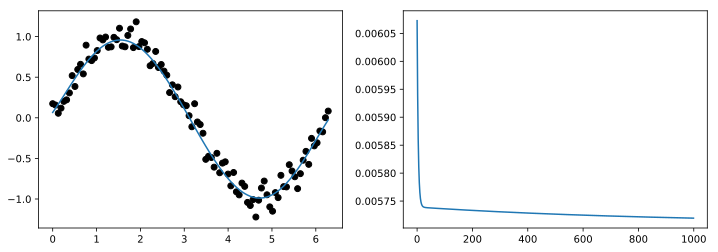

In [19]:
#五次拟合
np.random.seed(0)
n, p = A_sklearn5.shape
wt_init = np.random.randn(p)
print(wt_init.shape)
wt_init=np.atleast_2d(wt_init).T
print(wt_init.shape)
wt_init=np.array([[ 0.06609572],[ 0.76199846],[ 0.30174765],[-0.39249996],[ 0.08598679],[-0.00544834]])
print("Initial weight:", wt_init)
core=1
l2=10**(-5)
rate=10**(-7)
n_iterations=1000
wfin, whist, meanlosstrace = reg_gradientdescent(wt_init, A_sklearn5, y, l2,core,rate,n_iterations)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4)) #画一行两列
ax[0].scatter(X,y,marker='o',color='k')
# y_predict=
print("wfin=",wfin)
y_pridict= A_sklearn5.dot(wfin)
ax[0].plot(X,y_pridict)  #拟合的曲线
ax[1].plot(meanlosstrace)  #误差曲线

## 4.1.2 Analytical expression

In [20]:
def ridgeRegres(xMat,yMat,lam=0.2):
#     print("xMat:",xMat.shape)
    xTx = np.dot(xMat.T,xMat)
    denom = xTx + np.eye(np.shape(xMat)[1])*lam
    if np.linalg.det(denom) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = np.dot(np.linalg.inv(denom), np.dot(xMat.T,yMat))  #np.linalg.pinv 求广义逆
    return ws


In [30]:
def ridgeRegres2(X,lam):
    U, S, V = np.linalg.svd(X.T.dot(X) + lam * np.identity(np.shape(X)[1]))
    S = np.diag(S)
    X_sq_reg_inv = V.dot(np.linalg.pinv(S)).dot(U.T)
    w = X_sq_reg_inv.dot(X.T).dot(y)
    return w

In [22]:
wfin=ridgeRegres(A_sklearn5,y,lam=10**(-5))
print(wfin)

[[ 0.03732825]
 [ 0.81637355]
 [ 0.29048207]
 [-0.38837527]
 [ 0.08425683]
 [-0.00526893]]


wfin= [[ 0.03768982]
 [ 0.81516476]
 [ 0.29153329]
 [-0.38874759]
 [ 0.08431486]
 [-0.00527224]]
wfin= [[-1.46498089e-01]
 [ 1.76272053e+00]
 [-7.86349731e-01]
 [ 7.23623080e-02]
 [ 1.52056248e-03]]
wfin= [[-0.17831143]
 [ 1.86883582]
 [-0.86325917]
 [ 0.0914687 ]]
wfin= [[ 0.92176514]
 [-0.28675196]
 [-0.0012109 ]]
wfin= [[ 0.92965167]
 [-0.29436016]]


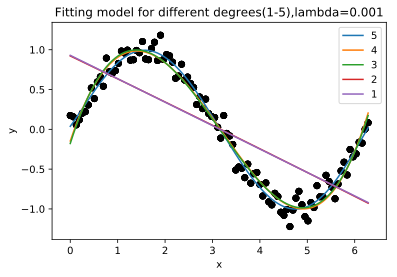

wfin= [[ 0.04080978]
 [ 0.80485373]
 [ 0.30041516]
 [-0.39186843]
 [ 0.08479804]
 [-0.00529964]]
wfin= [[-0.13797208]
 [ 1.74001398]
 [-0.77186012]
 [ 0.06905289]
 [ 0.00176858]]
wfin= [[-0.17468426]
 [ 1.86297955]
 [-0.86115011]
 [ 0.09125944]]
wfin= [[ 0.92090736]
 [-0.28617752]
 [-0.00128876]]
wfin= [[ 0.92929731]
 [-0.29427399]]


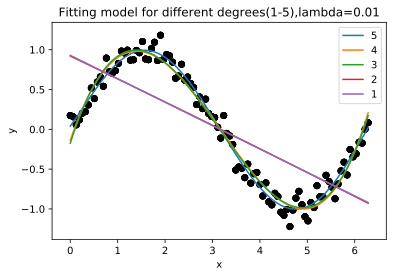

wfin= [[ 0.09345815]
 [ 0.67402744]
 [ 0.38124815]
 [-0.41078895]
 [ 0.08647153]
 [-0.00533294]]
wfin= [[ 0.06075926]
 [ 1.20468142]
 [-0.4294517 ]
 [-0.00920529]
 [ 0.00763444]]
wfin= [[-0.05696566]
 [ 1.67062544]
 [-0.7915929 ]
 [ 0.08434366]]
wfin= [[ 0.88984358]
 [-0.265416  ]
 [-0.00410011]]
wfin= [[ 0.91610255]
 [-0.291065  ]]


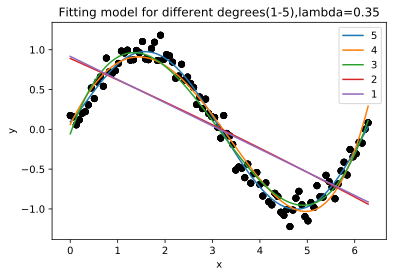

wfin= [[ 0.14031415]
 [ 0.60620493]
 [ 0.37082892]
 [-0.3863034 ]
 [ 0.07990367]
 [-0.00482397]]
wfin= [[ 0.19577464]
 [ 0.8227384 ]
 [-0.18290602]
 [-0.06568378]
 [ 0.01186942]]
wfin= [[ 0.09548363]
 [ 1.4117899 ]
 [-0.69680708]
 [ 0.07485948]]
wfin= [[ 0.83692168]
 [-0.23025147]
 [-0.00884877]]
wfin= [[ 0.89187656]
 [-0.28517194]]


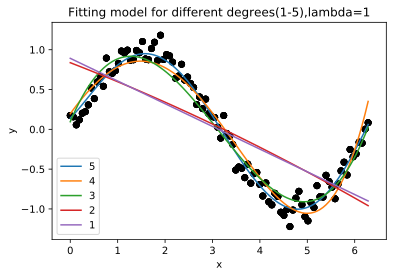

wfin= [[ 0.24536428]
 [ 0.45268794]
 [ 0.27135997]
 [-0.27594447]
 [ 0.05247235]
 [-0.00275242]]
wfin= [[ 0.29496359]
 [ 0.42594123]
 [ 0.08305537]
 [-0.12664514]
 [ 0.01640606]]
wfin= [[ 0.38312438]
 [ 0.81124911]
 [-0.4637081 ]
 [ 0.05087856]]
wfin= [[ 0.62621706]
 [-0.09418248]
 [-0.02697304]]
wfin= [[ 0.7667071 ]
 [-0.25469286]]


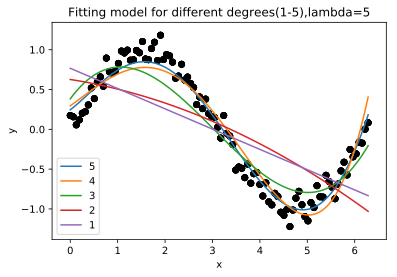

wfin= [[ 0.26661092]
 [ 0.37137416]
 [ 0.21668489]
 [-0.21005439]
 [ 0.03556365]
 [-0.00145152]]
wfin= [[ 0.28305202]
 [ 0.34441721]
 [ 0.13905011]
 [-0.13825826]
 [ 0.01716868]]
wfin= [[ 0.42351003]
 [ 0.58250144]
 [-0.36112366]
 [ 0.03967589]]
wfin= [[ 0.49175251]
 [-0.0136318 ]
 [-0.03729044]]
wfin= [[ 0.65167885]
 [-0.22661929]]


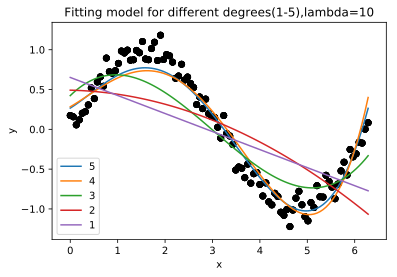

In [45]:
#####同一个lambda, 不同的次数拟合, 外面再加一个大循环用lambda
# fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4)) #画一行两列
# lam=3  #10**(-5)
# lam=0.35
lamb_array=[10**(-3),10**(-2),0.35,1,5,10]
# lamb_array=[10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),1,3]
for j in range(len(lamb_array)):
    wfin=ridgeRegres(A_sklearn5,y,lamb_array[j])
    plt.scatter(X,y,marker='o',color='k')
    print("wfin=",wfin)
    y_pridict= A_sklearn5.dot(wfin)
    plt.plot(X,y_pridict,label=5)  #拟合的曲线

    wfin=ridgeRegres(A_sklearn4,y,lamb_array[j])
    plt.scatter(X,y,marker='o',color='k')
    print("wfin=",wfin)
    y_pridict= A_sklearn4.dot(wfin)
    plt.plot(X,y_pridict,label=4)  #拟合的曲线

    wfin=ridgeRegres(A_sklearn3,y,lamb_array[j])
    plt.scatter(X,y,marker='o',color='k')
    print("wfin=",wfin)
    y_pridict= A_sklearn3.dot(wfin)
    plt.plot(X,y_pridict,label=3)  #拟合的曲线

    wfin=ridgeRegres(A_sklearn2,y,lamb_array[j])
    plt.scatter(X,y,marker='o',color='k')
    print("wfin=",wfin)
    y_pridict= A_sklearn2.dot(wfin)
    plt.plot(X,y_pridict,label=2)  #拟合的曲线

    wfin=ridgeRegres(A_sklearn1,y,lamb_array[j])
    plt.scatter(X,y,marker='o',color='k')
    print("wfin=",wfin)
    y_pridict= A_sklearn1.dot(wfin)
    plt.plot(X,y_pridict,label=1)  #拟合的曲线
    
    title="Fitting model for different degrees(1-5),lambda="+str(lamb_array[j])
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.savefig('ridge_regress'+str(j)+ '.pdf', bbox_inches='tight')
    
    plt.show()
    


In [ ]:
#### 同一次数拟合, 不同的lambda

## 4.1.3 Plot the measure of the mean of the squared residuals

In [31]:
# 同一lambda,不同次数多项式的拟合,train集得到拟合系数,design matrix由train集得到,test集测试
# lamb=3
lamb=0.35
polyfeat1 = PolynomialFeatures(degree =1, include_bias = True)
A_train_sklearn1 = polyfeat1.fit_transform(X_train) 
wtrain1=ridgeRegres(A_train_sklearn1,y_train,lamb)
print(wtrain1)

polyfeat2 = PolynomialFeatures(degree =2, include_bias = True)
A_train_sklearn2 = polyfeat2.fit_transform(X_train) 
wtrain2=ridgeRegres(A_train_sklearn2,y_train,lamb)
print(wtrain2)

polyfeat3 = PolynomialFeatures(degree =3, include_bias = True)
A_train_sklearn3 = polyfeat3.fit_transform(X_train) 
wtrain3=ridgeRegres(A_train_sklearn3,y_train,lamb)
print(wtrain3)

polyfeat4 = PolynomialFeatures(degree =4, include_bias = True)
A_train_sklearn4 = polyfeat4.fit_transform(X_train) 
wtrain4=ridgeRegres(A_train_sklearn4,y_train,lamb)
print(wtrain4)

polyfeat5 = PolynomialFeatures(degree =5, include_bias = True)
A_train_sklearn5 = polyfeat5.fit_transform(X_train) 
wtrain5=ridgeRegres(A_train_sklearn5,y_train,lamb)
print(wtrain5)

[[ 0.88064595]
 [-0.26145365]]
[[ 0.90423784]
 [-0.28398876]
 [ 0.00352208]]
[[ 0.00989414]
 [ 1.58583137]
 [-0.7659199 ]
 [ 0.08209619]]
[[ 0.12438169]
 [ 1.08211402]
 [-0.35564519]
 [-0.02723919]
 [ 0.0090957 ]]
[[ 0.12473313]
 [ 0.6298145 ]
 [ 0.40324471]
 [-0.41443669]
 [ 0.08610392]
 [-0.00524178]]


In [28]:
'''
 Amat:n*p
 wfin:p*1
 '''
def fun_y_pridict(Amat,wfin):
    y_predict=Amat.dot(wfin)
    return y_predict

'''
 Amat:n*p
 wfin:p*1
 y:n*1,true value
 lamb:scalar
 '''
def fun_loss(w,Amat,y,lamb=10**(-5)):
     w_without_t0=w[1:]  #把截距项去掉
     meanrss= 0.5*np.square(y-Amat.dot(w)).mean()+0.5*lamb*np.sum(np.square(w_without_t0)) #标量
     meanrss2=0.5*mean_squared_error(Amat.dot(w),y)+0.5*lamb*np.sum(np.square(w_without_t0))
#      print("meanrss=",meanrss,meanrss2)  两者完全相等
#      meanrss3=0.5*np.square(y-Amat.dot(w)).mean()+0.5*lamb*np.sum(np.square(w))
     return meanrss

[[ 0.89820963]
 [-0.26572037]]
[[ 0.94960645]
 [-0.31400884]
 [ 0.00750169]]
[[-0.15019301]
 [ 1.85171951]
 [-0.86335049]
 [ 0.09179636]]
[[-0.10834994]
 [ 1.70956916]
 [-0.7585231 ]
 [ 0.06533838]
 [ 0.00212808]]
[[ 0.08073729]
 [ 0.69613463]
 [ 0.40301246]
 [-0.4309998 ]
 [ 0.09083921]
 [-0.00561508]]
0.11494798667850673
0.11615322020555005
0.006767060178806867
0.0070550622112565175
0.006221003084684806


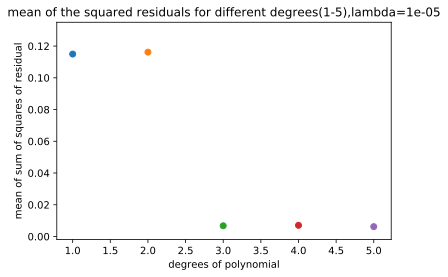

[[ 0.89769871]
 [-0.26559626]]
[[ 0.94823662]
 [-0.31310033]
 [ 0.00738113]]
[[-0.14458243]
 [ 1.84255555]
 [-0.86001144]
 [ 0.09146484]]
[[-0.09655776]
 [ 1.6783034 ]
 [-0.73851948]
 [ 0.0607467 ]
 [ 0.00247354]]
[[ 0.08275405]
 [ 0.69149941]
 [ 0.4055947 ]
 [-0.43149629]
 [ 0.09086227]
 [-0.00561377]]
0.11531653932174268
0.11663707786125953
0.027469875895934297
0.02393742293905447
0.01040950294771849


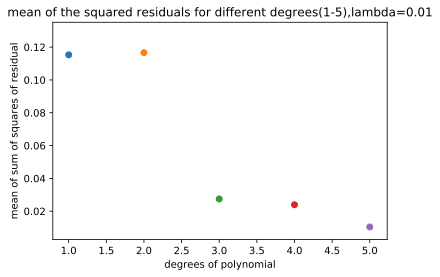

[[ 0.89312156]
 [-0.2644844 ]]
[[ 0.9361025 ]
 [-0.30505817]
 [ 0.00631421]]
[[-0.09720459]
 [ 1.7647843 ]
 [-0.83162588]
 [ 0.08864425]]
[[-0.01022942]
 [ 1.44823738]
 [-0.59115951]
 [ 0.02690938]
 [ 0.00501967]]
[[ 0.09685691]
 [ 0.66557317]
 [ 0.41340237]
 [-0.43001099]
 [ 0.09008097]
 [-0.00554283]]
0.11860913605724117
0.12075677354379717
0.19765095402772898
0.13022168689510502
0.04661397367898967


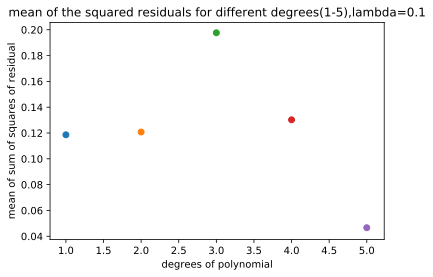

[[ 0.84976544]
 [-0.25395018]]
[[ 0.83221677]
 [-0.23667246]
 [-0.00272954]]
[[ 0.18443243]
 [ 1.27844443]
 [-0.6511394 ]
 [ 0.07056458]]
[[ 0.24726114]
 [ 0.7219884 ]
 [-0.12077402]
 [-0.08142513]
 [ 0.01317685]]
[[ 0.17447563]
 [ 0.57377616]
 [ 0.36468359]
 [-0.37485687]
 [ 0.07654997]
 [-0.00453401]]
0.14898681354487406
0.14438792860405342
1.045030574416638
0.28379891565551224
0.31111402728776794


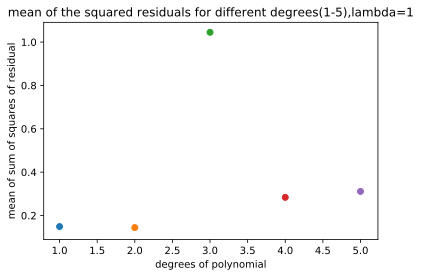

In [32]:
#由test集得到design matrix,用于在test集上预测
#同一个lambda, 不同的次数, 外加一lambda大循环
lamb_array=[10**(-5),10**(-2),10**(-1),1]
for j in range(len(lamb_array)):
    polyfeat1 = PolynomialFeatures(degree =1, include_bias = True)
    A_train_sklearn1 = polyfeat1.fit_transform(X_train) 
    wtrain1=ridgeRegres(A_train_sklearn1,y_train,lamb_array[j]) #w is decided by lambda,has to be put into the loop
    print(wtrain1)

    polyfeat2 = PolynomialFeatures(degree =2, include_bias = True)
    A_train_sklearn2 = polyfeat2.fit_transform(X_train) 
    wtrain2=ridgeRegres(A_train_sklearn2,y_train,lamb_array[j])
    print(wtrain2)

    polyfeat3 = PolynomialFeatures(degree =3, include_bias = True)
    A_train_sklearn3 = polyfeat3.fit_transform(X_train) 
    wtrain3=ridgeRegres(A_train_sklearn3,y_train,lamb_array[j])
    print(wtrain3)

    polyfeat4 = PolynomialFeatures(degree =4, include_bias = True)
    A_train_sklearn4 = polyfeat4.fit_transform(X_train) 
    wtrain4=ridgeRegres(A_train_sklearn4,y_train,lamb_array[j])
    print(wtrain4)

    polyfeat5 = PolynomialFeatures(degree =5, include_bias = True)
    A_train_sklearn5 = polyfeat5.fit_transform(X_train) 
    wtrain5=ridgeRegres(A_train_sklearn5,y_train,lamb_array[j])
    print(wtrain5)
    
    polyfeat1 = PolynomialFeatures(degree =1, include_bias = True)
    Atext1 = polyfeat1.fit_transform(X_test) 

    polyfeat2 = PolynomialFeatures(degree =2, include_bias = True)
    Atext2 = polyfeat2.fit_transform(X_test) 

    polyfeat3 = PolynomialFeatures(degree =3, include_bias = True)
    Atext3 = polyfeat3.fit_transform(X_test) 

    polyfeat4 = PolynomialFeatures(degree =4, include_bias = True)
    Atext4 = polyfeat4.fit_transform(X_test) 

    polyfeat5 = PolynomialFeatures(degree =5, include_bias = True)
    Atext5 = polyfeat5.fit_transform(X_test) 

    # lamb=3
    lamb=10**(-5)
    meanloss1=fun_loss(wtrain1, Atext1, y_test,lamb_array[j])
    meanloss2=fun_loss(wtrain2, Atext2, y_test,lamb_array[j])
    meanloss3=fun_loss(wtrain3, Atext3, y_test,lamb_array[j])
    meanloss4=fun_loss(wtrain4, Atext4, y_test,lamb_array[j])
    meanloss5=fun_loss(wtrain5, Atext5, y_test,lamb_array[j])

    meanloss_list=[]
    meanloss_list.append(meanloss1)
    meanloss_list.append(meanloss2)
    meanloss_list.append(meanloss3)
    meanloss_list.append(meanloss4)
    meanloss_list.append(meanloss5)
    meanloss_array= np.asarray(meanloss_list)

#     fig,ax=plt.subplots(1,1)
#     # ax.set_xlim([1,5])
#     for i in range(5):
#         print(meanloss_array[i])
#         ax.scatter(i+1,meanloss_array[i])
#         title="mean of the squared residuals for different degrees(1-5),lambda="+str(lamb_array[j])
#         ax.set_title(title)
#         ax.set_xlabel("degrees of polynomial")
#         ax.set_ylabel("mean of sum of squares of residual")
        
    # ax.set_xlim([1,5])
    for i in range(5):
        print(meanloss_array[i])
        plt.scatter(i+1,meanloss_array[i])
        title="mean of the squared residuals for different degrees(1-5),lambda="+str(lamb_array[j])
        plt.title(title)
        plt.xlabel("degrees of polynomial")
        plt.ylabel("mean of sum of squares of residual")
    plt.savefig('mean_residuals'+str(j)+'.pdf', bbox_inches='tight')
    plt.show()

[0.006767060178806867, 0.006955327378954727, 0.00883623057713782, 0.027469875895934297, 0.19765095402772898, 1.045030574416638, 1.5010357888950345]


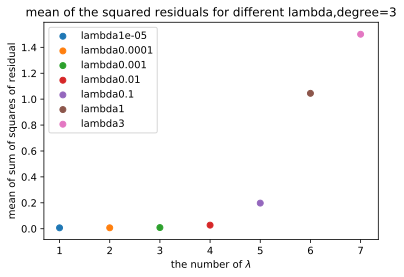

In [33]:
# 同一次数多项式的拟合,对应于不同lambda,train集得到拟合系数,test集测试
d=3
polyfeat = PolynomialFeatures(degree =3, include_bias = True)
Atext = polyfeat.fit_transform(X_test) 
lamb_array=[10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),1,3]
# lamb_array=np.arange(0.1,1,0.1,dtype='float32')
# lamb_array=[10**(-5),10**(-3),1,3,10]
# print(len(lamb_array))
wfin_list=[]
ypredict_list=[]
meanloss_list=[]
for i in range(len(lamb_array)):
    wfin=ridgeRegres(A_train_sklearn3,y_train,lamb_array[i]) #p*1(p=6)
    wfin_list.append(wfin)
    y_predict=fun_y_pridict(Atext,wfin)  #n*1(n=30)
    meanloss=fun_loss(wfin, Atext, y_test,lamb_array[i])
    meanloss_list.append(meanloss)
#   sns.residplot(X_test,y_test,order=i+1,label="lambda"+str(i+1))
    
#     print(y_predict.shape)
#     ypredict_list.append(y_predict)
# wfin_array=np.asarray(wfin_list)
# ypredict_array=np.asarray(ypredict_list)
# print(ypredict_array.shape)

# title="the residuals distribution for different lambda,degree=3"
# plt.xlabel('x')  
# plt.ylabel('residuals') 
# plt.title(title)
# plt.legend()

# meanloss_array=np.asarray(meanloss_list)
print(meanloss_list)
# ax.set_xlim([1,5])
for i in range(len(lamb_array)):
    plt.scatter(i+1, meanloss_list[i],label="lambda"+str(lamb_array[i]))#"lambda"+str(i+1)
title="mean of the squared residuals for different lambda,degree="+str(d)
plt.title(title)
plt.xlabel("the number of $\lambda$")
plt.ylabel("mean of sum of squares of residual")
plt.legend()
plt.savefig('mean_residuals_degree3.pdf', bbox_inches='tight')
plt.show()


## 4.2 Linear regression generalise

(90, 1)
(10, 1)
[[5.26772102]
 [3.36372547]
 [4.44265628]
 [2.85599332]
 [2.7925268 ]
 [2.47519421]
 [1.3962634 ]
 [5.07732146]
 [0.63466518]
 [0.        ]]


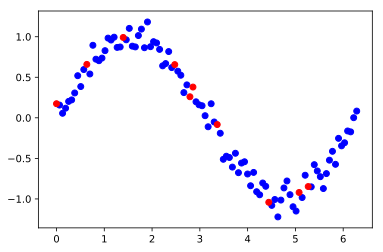

In [36]:
X_train_one,X_test_one,y_train_one,y_test_one=train_test_split(X,y,test_size=0.1,random_state=42)  
print(X_train_one.shape)
print(X_test_one.shape)
print(X_test_one)
plt.scatter(X_train_one,y_train_one, c='b')
plt.scatter(X_test_one,y_test_one, c='r')

### 4.2.1 LeaveOneOut

In [37]:
from sklearn.model_selection import LeaveOneOut

lamb_array=[10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),1,3]
loo = LeaveOneOut()
i=0
d=3
meanloss_list=[]
meanloss_mean_list=[]
meanloss_sum=0
for j in range(len(lamb_array)):
    i=0
    meanloss_sum=0
    meanloss_list=[]
    for train_index, test_index in loo.split(X):  #将样本分成100等分,留1份作为测试,一共重复100次
#     print("TRAIN:", train_index, "TEST:", test_index)
        X_train1, X_test1 = X[train_index], X[test_index]
        y_train1, y_test1 = y[train_index], y[test_index]
        i+=1
#     print(X_train, X_test, y_train, y_test)
#     print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)
        polyfit = PolynomialFeatures(degree =d, include_bias = True)
        Amat = polyfit.fit_transform(X_train1) 
        Amat_test=polyfit.fit_transform(X_test1) 
        wfin=ridgeRegres(Amat,y_train1,lamb_array[j]) #p*1
#     wfin_list.append(wfin)
        y_predict=fun_y_pridict(Amat_test,wfin)  #n*1
        meanloss=fun_loss(wfin, Amat_test, y_test1,lamb_array[j])
        meanloss_list.append(meanloss)
#         print("meanloss="+str(meanloss))
#         meanloss_sum+=meanloss
#     meanloss_sum_mean=meanloss_sum/i
    meanloss_sum_mean=np.mean(meanloss_list)  #求得对于每个lamb每个留一验证的均值
#     print("meanloss_sum_mean="+str(meanloss_sum_mean))
    meanloss_mean_list.append(meanloss_sum_mean)  #记录对于每个lamb的meanloss的均值
#     print(i) 


[0.008221783112287771, 0.00841292396917583, 0.010323055642366545, 0.029297449169421654, 0.20707443849025448, 1.2484774209355691, 1.9681432102432026]


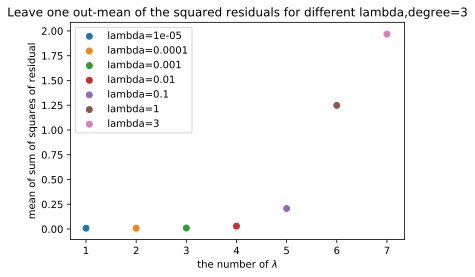

In [38]:
# meanloss_array=np.asarray(meanloss_list)
fig,ax=plt.subplots(1,1)
# ax.set_xlim([1,5])
print(meanloss_mean_list)
# for i in range(len(lamb_array)):
#     ax.scatter(i+1, meanloss_mean_list[i],label="lambda="+str(lamb_array[i]))
# title="mean of the squared residuals for different lambda,degree="+str(d)
# ax.set_title(title)

for i in range(len(lamb_array)):
    plt.scatter(i+1, meanloss_mean_list[i],label="lambda="+str(lamb_array[i]))
title="Leave one out-mean of the squared residuals for different lambda,degree="+str(d)
plt.title(title)
plt.xlabel("the number of $\lambda$")
plt.ylabel("mean of sum of squares of residual")
plt.legend()
plt.savefig('mean_residuals_degree3_leave_one_out.pdf', bbox_inches='tight')
plt.show()

In [25]:
from sklearn.model_selection import RepeatedKFold
X1 = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X1):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


### 4.2.2 10 Fold

In [39]:
from sklearn.model_selection import RepeatedKFold
lamb_array=[10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),1,3]
random_state = 12883823
rkf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=random_state)
i=0
d=3
meanloss_list=[]
meanloss_mean_list=[]
meanloss_sum=0
for j in range(len(lamb_array)):
    i=0
    meanloss_sum=0
    meanloss_list=[]
    for train_index, test_index in rkf.split(X):
#         print(train_index)
        X_train1, X_test1 = X[train_index], X[test_index]
        y_train1, y_test1 = y[train_index], y[test_index]
        i+=1
#     print(X_train, X_test, y_train, y_test)
#         print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)
        polyfit = PolynomialFeatures(degree =d, include_bias = True)
        Amat = polyfit.fit_transform(X_train1) 
        Amat_test=polyfit.fit_transform(X_test1) 
        wfin=ridgeRegres(Amat,y_train1,lamb_array[j]) #p*1
#     wfin_list.append(wfin)
        y_predict=fun_y_pridict(Amat_test,wfin)  #n*1
        meanloss=fun_loss(wfin, Amat_test, y_test1,lamb_array[j])
        meanloss_list.append(meanloss)
#         print("meanloss="+str(meanloss))
#         meanloss_sum+=meanloss
#     meanloss_sum_mean=meanloss_sum/i
    meanloss_sum_mean=np.mean(meanloss_list)  #求得对于每个lamb每个验证的均值
#     print("meanloss_sum_mean="+str(meanloss_sum_mean))
    meanloss_mean_list.append(meanloss_sum_mean)  #记录对于每个lamb的meanloss的均值

[0.008529134532091814, 0.008720626813097121, 0.010634131760266933, 0.02962834308579662, 0.2063782712358771, 1.1965766066842418, 1.8341662842065785]


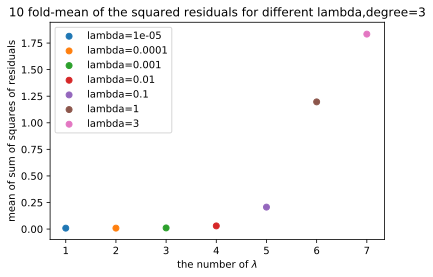

In [40]:
fig,ax=plt.subplots(1,1)
# ax.set_xlim([1,5])
print(meanloss_mean_list)
# for i in range(len(lamb_array)):
#     ax.scatter(i+1, meanloss_mean_list[i],label="lambda="+str(lamb_array[i]))
# title="mean of the squared residuals for different lambda,degree="+str(d)
# ax.set_title(title)

for i in range(len(lamb_array)):
    plt.scatter(i+1, meanloss_mean_list[i],label="lambda="+str(lamb_array[i]))
title="10 fold-mean of the squared residuals for different lambda,degree="+str(d)
plt.title(title)
plt.xlabel("the number of $\lambda$")
plt.ylabel("mean of sum of squares of residuals")
plt.legend()
plt.savefig('mean_residuals_degree3_10fold.pdf', bbox_inches='tight')
plt.show()

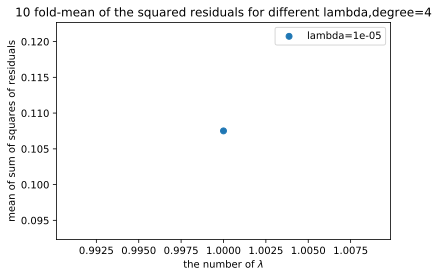

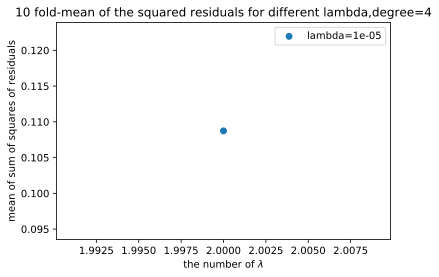

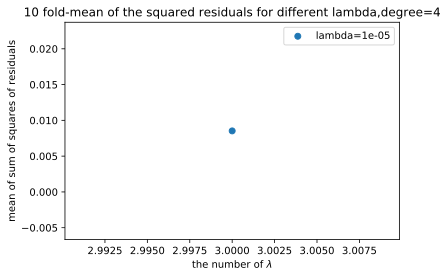

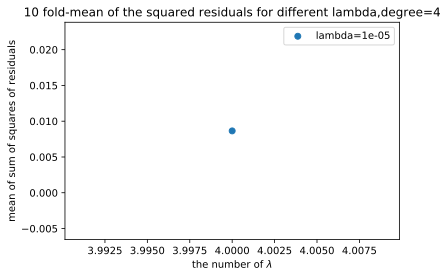

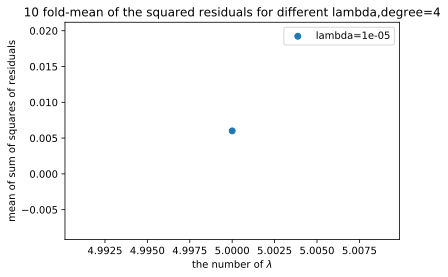

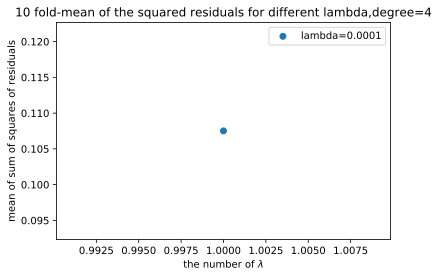

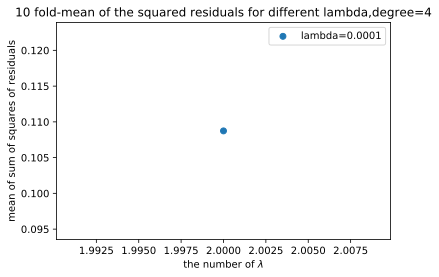

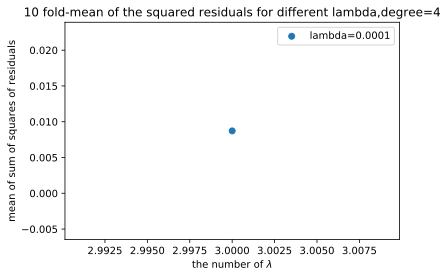

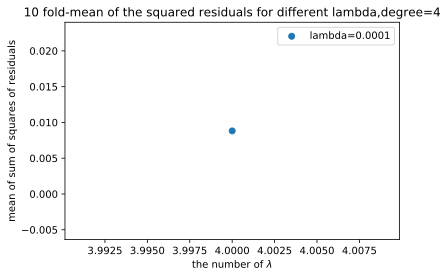

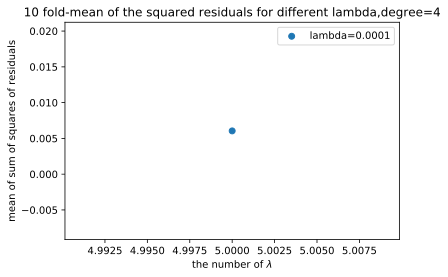

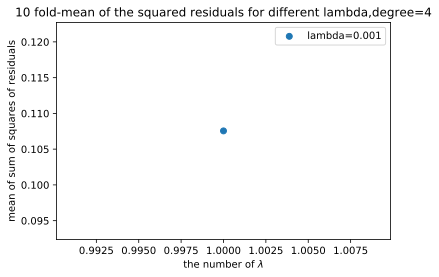

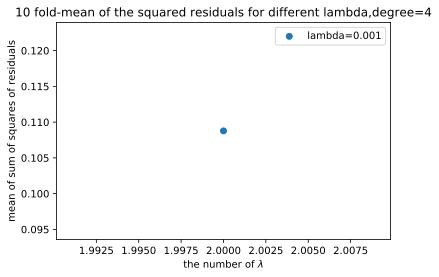

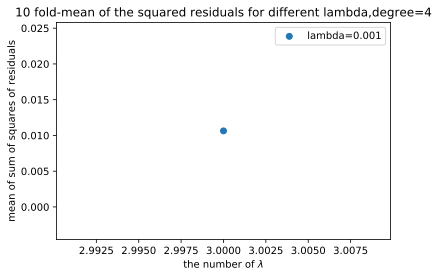

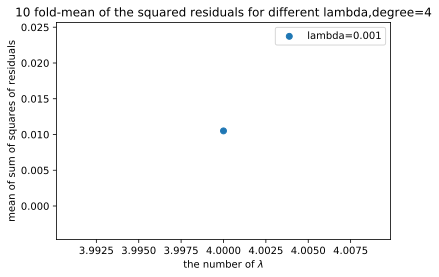

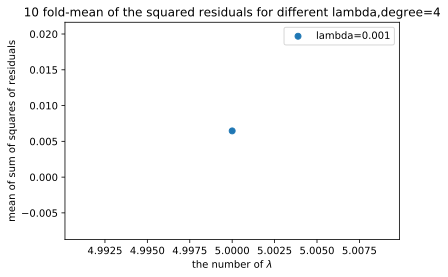

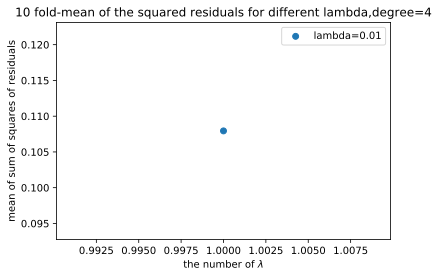

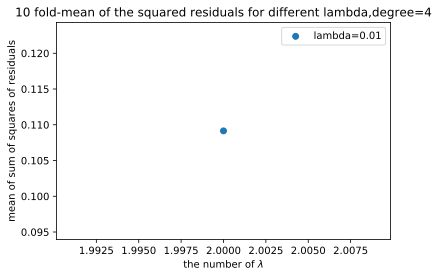

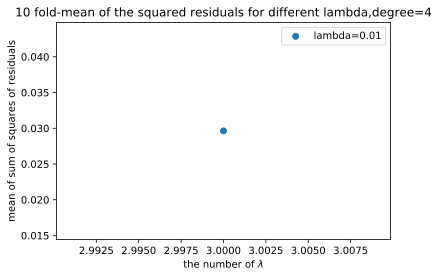

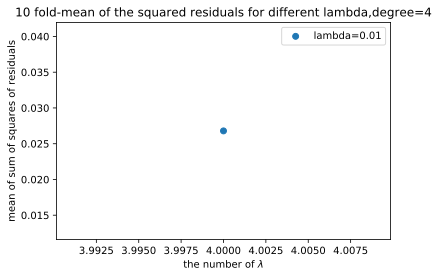

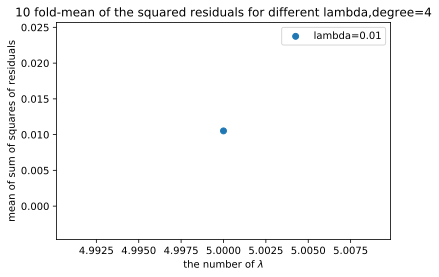

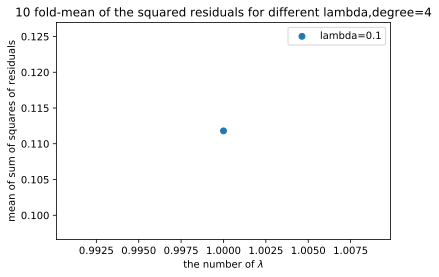

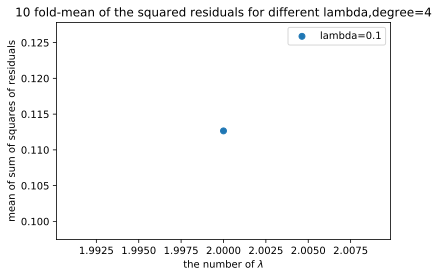

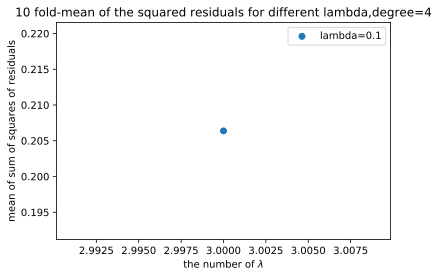

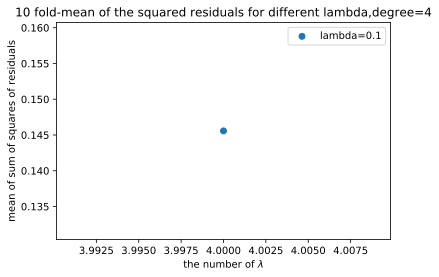

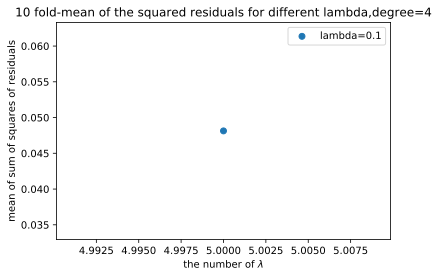

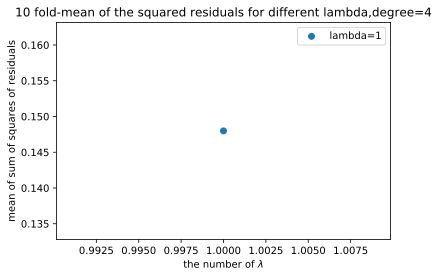

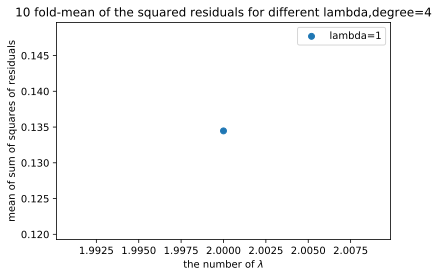

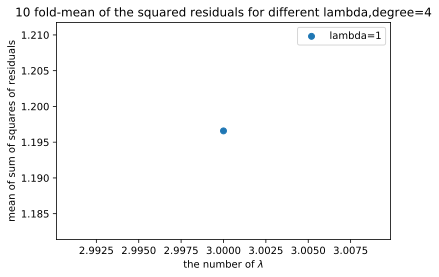

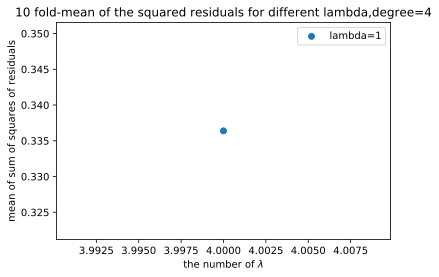

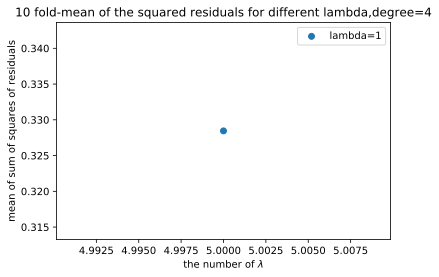

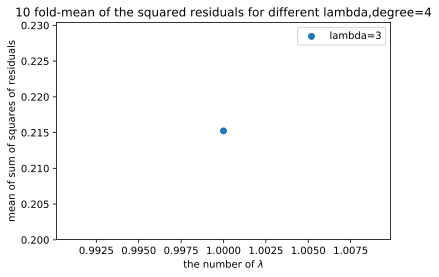

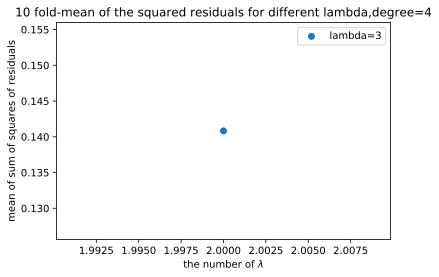

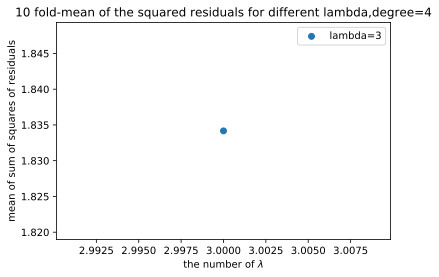

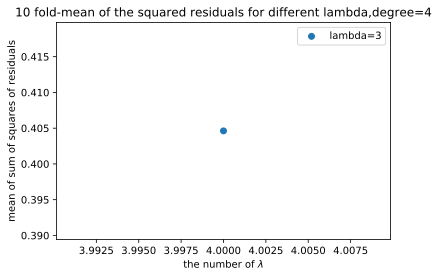

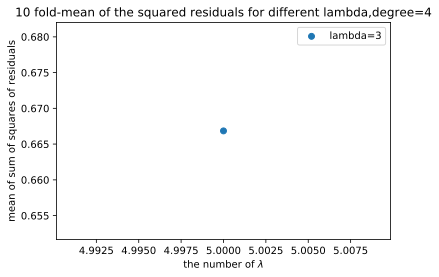

In [44]:
from sklearn.model_selection import RepeatedKFold
lamb_array=[10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),1,3]
random_state = 12883823
rkf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=random_state)
i=0
d=3
meanloss_list=[]
meanloss_mean_list=[]
meanloss_sum=0
for j in range(len(lamb_array)):
    meanloss_mean_list=[]
    for d in range(5):
        i=0
        meanloss_sum=0
        meanloss_list=[]
        for train_index, test_index in rkf.split(X):
    #         print(train_index)
            X_train1, X_test1 = X[train_index], X[test_index]
            y_train1, y_test1 = y[train_index], y[test_index]
            i+=1
    #     print(X_train, X_test, y_train, y_test)
    #         print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)
            polyfit = PolynomialFeatures(degree =d+1, include_bias = True)
            Amat = polyfit.fit_transform(X_train1) 
            Amat_test=polyfit.fit_transform(X_test1) 
            wfin=ridgeRegres(Amat,y_train1,lamb_array[j]) #p*1
    #     wfin_list.append(wfin)
            y_predict=fun_y_pridict(Amat_test,wfin)  #n*1
            meanloss=fun_loss(wfin, Amat_test, y_test1,lamb_array[j])
            meanloss_list.append(meanloss)
    #         print("meanloss="+str(meanloss))
    #         meanloss_sum+=meanloss
    #     meanloss_sum_mean=meanloss_sum/i
        meanloss_sum_mean=np.mean(meanloss_list)  #求得对于每个cross验证的均值
    #     print("meanloss_sum_mean="+str(meanloss_sum_mean))
        meanloss_mean_list.append(meanloss_sum_mean)  #记录对于每个d的meanloss的均值
    for k in range(len(meanloss_mean_list)):
        plt.scatter(k+1, meanloss_mean_list[k],label="lambda="+str(lamb_array[j]))
        title="10 fold-mean of the squared residuals for different lambda,degree="+str(d)
        plt.title(title)
        plt.xlabel("the number of $\lambda$")
        plt.ylabel("mean of sum of squares of residuals")
        plt.legend()
        plt.savefig('mean_residuals_degree'+str(d+1)+'10fold.pdf', bbox_inches='tight')
        plt.show()

In [ ]:
[0.007053160226309376, 0.007233869726496547, 0.009039259932614192, 0.0269241245068834, 0.19020445084153323, 1.0005595341011517, 1.4322379170339086]

In [ ]:
[0.007803106804795827, 0.00800581637940324, 0.010030965640193654, 0.030089466135929006, 0.21290880126994913, 1.1063643469147797, 1.554990513506641]